CI pipeline create by classical editor (graphical UI)

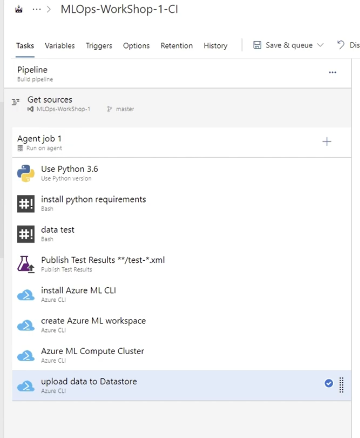

tasks:<br>
- Use Python 3.6
- install python requirements
- data test
- Publish Test Results **/test-*.xml
- install Azure ML CLI
- create Azure ML workspace
- Azure ML Compute Cluster
- upload data to Datastore


it first installs azure ml cli and then it uses azure ml cli for with a bash inline command
- create Azure ML workspace
- Azure ML Compute Cluster
- upload data to Datastore

gpt output to create the CI pipeline with pipeline as code (pac):<br>

**note**: scripts are different from videos.


```python
trigger:
- main

pool:
  vmImage: 'ubuntu-latest'

steps:

# Use Python 3.6
- task: UsePythonVersion@0
  inputs:
    versionSpec: '3.6'

# Install Python requirements
- script: |
    python -m pip install --upgrade pip
    pip install -r requirements.txt
  displayName: 'Install Python Requirements'

# Run data tests
- script: |
    pytest tests/ --junitxml=test-results/results.xml
  displayName: 'Run Data Tests'

# Publish Test Results
- task: PublishTestResults@2
  inputs:
    testResultsFiles: '**/test-*.xml'
    testRunTitle: 'Publish Test Results'

# Install Azure ML CLI
- script: |
    curl -sL https://aka.ms/InstallAzureCLIDeb | sudo bash
    az extension add -n azure-cli-ml
  displayName: 'Install Azure ML CLI'

# Create Azure ML Workspace
- script: |
    az login --service-principal -u $(azureServicePrincipalUsername) -p $(azureServicePrincipalPassword) --tenant $(azureTenant)
    az ml workspace create --name $(workspaceName) --resource-group $(resourceGroupName) --location $(location)
  displayName: 'Create Azure ML Workspace'

# Create Azure ML Compute Cluster
- script: |
    az ml compute create --name $(computeName) --size Standard_DS11_v2 --min-instances 0 --max-instances 4 --workspace-name $(workspaceName) --resource-group $(resourceGroupName)
  displayName: 'Create Azure ML Compute Cluster'

# Upload data to Datastore
- script: |
    az ml data upload --path ./data --name dataset_name --datastore-name workspaceblobstore --workspace-name $(workspaceName) --resource-group $(resourceGroupName)
  displayName: 'Upload Data to Datastore'

```
